In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# NEW ZEALAND - COVID-19 DATA ANALYSIS

#### Auth: Albert Zhang

In [2]:

import time
import datetime

##time_now
now = datetime.datetime.now()
print(now)


2020-04-05 12:28:13.480216


In [3]:
x = datetime.datetime.now()

print(x.strftime("%x"))

04/05/20


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

%pip --version

pip 19.2.3 from E:\Anaconda3\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [5]:
import urllib
from IPython.core.display import HTML

HTML("<iframe src=https://www.health.govt.nz/our-work/diseases-and-conditions/covid-19-novel-coronavirus/covid-19-current-situation/covid-19-current-cases width=1100 height=500></iframe>")


E:\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [6]:
# imports
import requests # How Python gets the webpages
import re
from openpyxl import workbook  # 写入Excel表所用
from openpyxl import load_workbook  # 读取Excel表所用 # Creates structured, searchable object
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import os

In [7]:
#import xlsxwriter

In [8]:
#workbook   = xlsxwriter.Workbook('NZdata.xlsx')
#worksheet1 = workbook.add_worksheet()
#worksheet2 = workbook.add_worksheet()

#worksheet1.write('A1', 123)

#workbook.close()

In [9]:
from pylab import rcParams #this module gives us some controls over plot rendering attributes
rcParams['figure.figsize'] = 15, 10

### Importing Time Series Data

In [372]:
ts_data = pd.read_csv(r"C:\Users\a1240\Desktop\COVID-19\nz_data\Total_nz.csv")

ts_data.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020/2/26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,872.0,4.794
1,2020/2/27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/2/28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2/29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/3/1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
ts_data.tail()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
53,2020/4/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2020/4/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2020/4/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2020/4/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2020/4/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
Date                                  58 non-null object
Total to date                         40 non-null float64
New in last 24 hours                  40 non-null float64
Total confirmed and probable cases    11 non-null float64
New confirmed and probable cases      15 non-null float64
Total of Recovered                    10 non-null float64
New Recovered                         9 non-null float64
Total of deaths                       8 non-null float64
New deaths                            8 non-null float64
Total                                 1 non-null float64
Total population(million - 2017)      1 non-null float64
dtypes: float64(10), object(1)
memory usage: 5.1+ KB


In [375]:
#ts_data_forecast['Date'] = pd.to_datetime(ts_data['Date'], format='%Y-%m-%d')
#ts_data.info()

In [376]:
ts_data_forecast = ts_data
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020/2/26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,872.0,4.794
1,2020/2/27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/2/28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2/29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/3/1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
ts_data_forecast['Date'] = pd.to_datetime(ts_data_forecast['Date'])
ts_data_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
Date                                  58 non-null datetime64[ns]
Total to date                         40 non-null float64
New in last 24 hours                  40 non-null float64
Total confirmed and probable cases    11 non-null float64
New confirmed and probable cases      15 non-null float64
Total of Recovered                    10 non-null float64
New Recovered                         9 non-null float64
Total of deaths                       8 non-null float64
New deaths                            8 non-null float64
Total                                 1 non-null float64
Total population(million - 2017)      1 non-null float64
dtypes: datetime64[ns](1), float64(10)
memory usage: 5.1 KB


In [378]:
#ts_data_forecast['Date'] = ts_data_forecast.set_index(ts_data_forecast['Date'])
#ts_data_forecast.index

In [379]:
ts_data_forecast.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017)
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,872.0,4.794
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
ts_data_forecast['Total to date'].max()

872.0

### Converting into Time Series Data

In [381]:
#ts_data_total = ts_data.set_index(['Date','Total to date','New in last 24 hours'])
#ts_data_total.head()

In [382]:
#ts_data_total.columns

In [383]:
N = len(ts_data_forecast)
ind = np.arange(N)

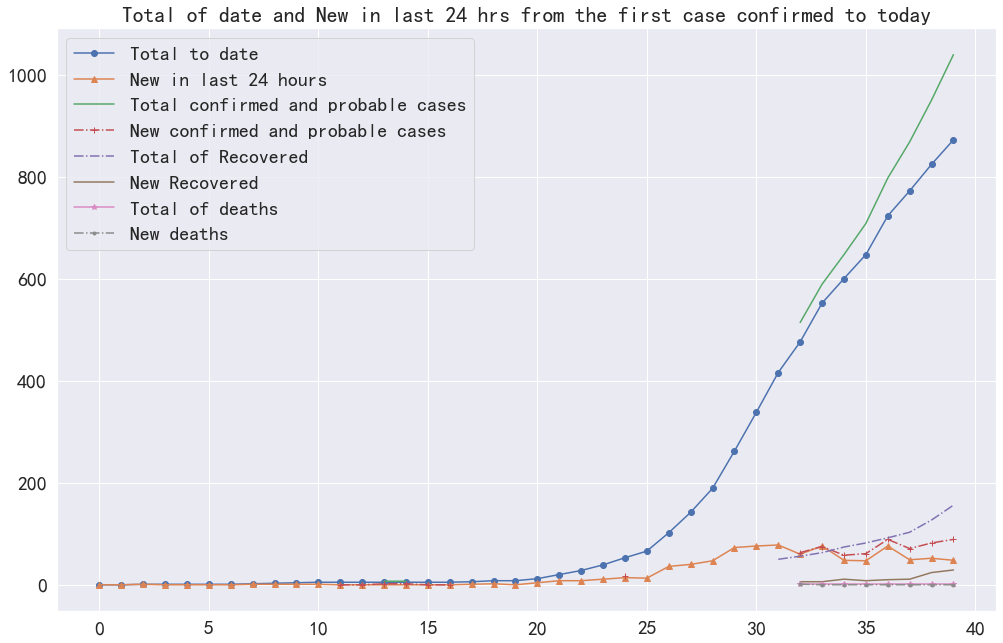

In [384]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ind, ts_data_forecast['Total to date'], 'o-', label='Total to date')
ax.plot(ind, ts_data_forecast['New in last 24 hours'], '^-', label='New in last 24 hours')
ax.plot(ind, ts_data_forecast['Total confirmed and probable cases'], '-', label='Total confirmed and probable cases')
ax.plot(ind, ts_data_forecast['New confirmed and probable cases'], '-.+', label='New confirmed and probable cases')
ax.plot(ind, ts_data_forecast['Total of Recovered'], '-.', label='Total of Recovered')
ax.plot(ind, ts_data_forecast['New Recovered'], '-', label='New Recovered')
ax.plot(ind, ts_data_forecast['Total of deaths'], '*-', label='Total of deaths')
ax.plot(ind, ts_data_forecast['New deaths'], '.-.', label='New deaths')

ax.set_title(u"Total of date and New in last 24 hrs from the first case confirmed to today")
ax.legend(loc='upper left')

plt.show()

In [385]:
#ts_data_forecast['shifted'] = ts_data_forecast['Total to date'].shift(1)
#ts_data_forecast

In [386]:
# population
N = 4794000
# simuation Time / Day
T = 28

In [387]:
def Logisticfquation(t,N,P0,r):
    t0=0
    exp_index=np.exp(r*t-t0)
    return(N*exp_index*P0)/N+(exp_index-1)*P0



In [388]:
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.integrate as spi
import numpy as np
# import pylab as pl
import matplotlib.pyplot as pl
import pandas as pd

In [389]:
##

ts_data_forecast['ID'] = ts_data_forecast.index
ts_data_forecastts_1 = ts_data_forecast

In [390]:
ts_data_forecastts_1.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017),ID
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,872.0,4.794,0
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [391]:
t = np.array(ts_data_forecastts_1["ID"])
P = np.array(ts_data_forecastts_1["Total to date"])

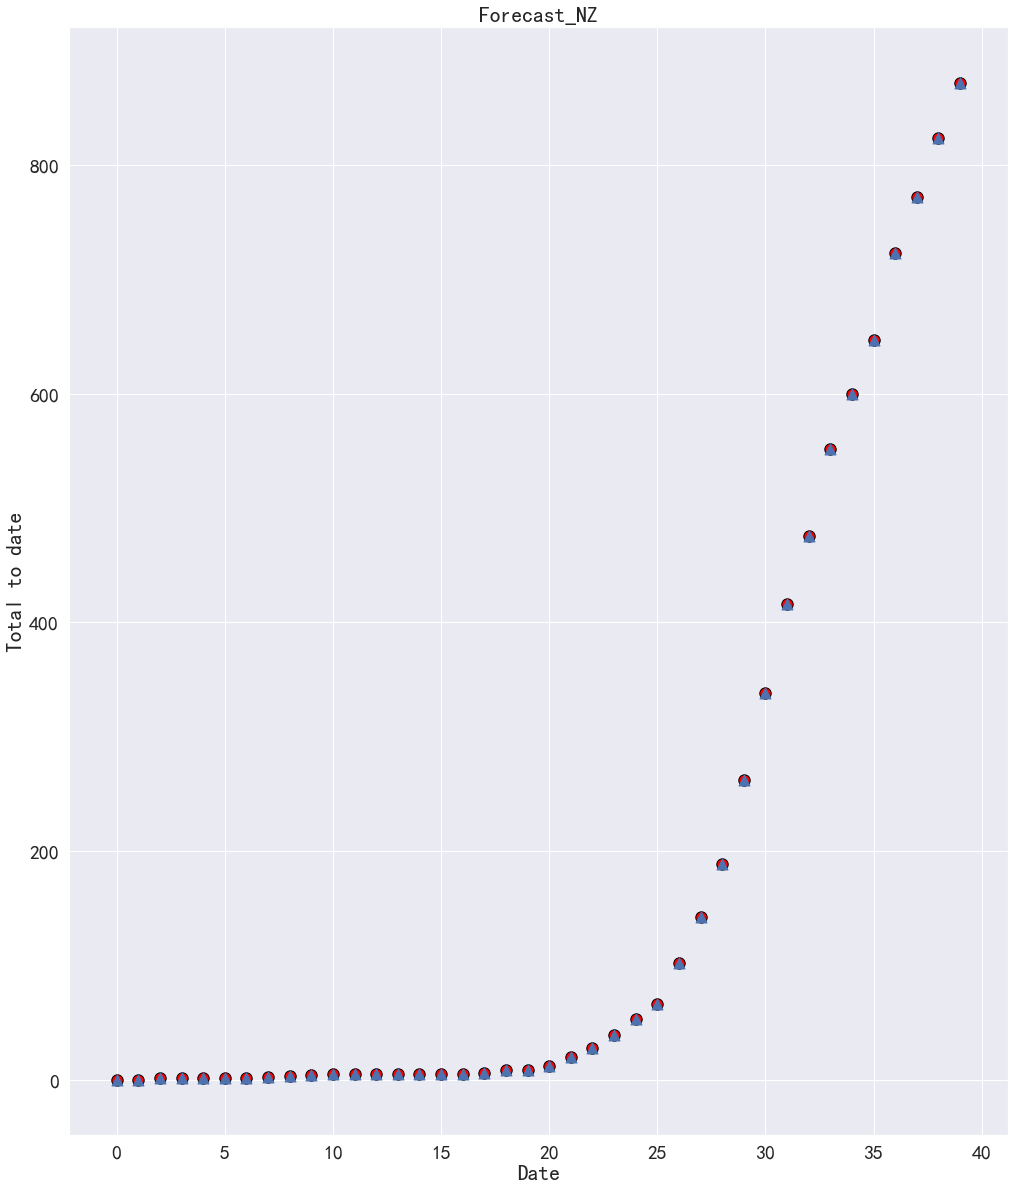

In [392]:
##
sns.set(font_scale = 1.8, font = 'SimHei')
df_future = ts_data_forecast
fig,ax = plt.subplots(figsize=(15,19))
#ax.plot( 'r', lw=2, label = 'Forecast_nz')
ax.scatter(t,P,s=130,facecolor='red',edgecolors='black',
           label='training data(before 2020-3-27)')
ax.scatter(df_future['ID'],df_future['Total to date'],s=120,marker='^',
            label='test data')

#plt.legent(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Total to date')
plt.title('Forecast_NZ')
plt.show()

In [393]:
ts_data_forecastts_1.head()

,Date,Total to date,New in last 24 hours,Total confirmed and probable cases,New confirmed and probable cases,Total of Recovered,New Recovered,Total of deaths,New deaths,Total,Total population(million - 2017),ID
0,2020-02-26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,872.0,4.794,0
1,2020-02-27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


I0 = 338
#计算β值，用确诊病例除以密切接触者人数
gammaguess = (data["治愈"]+data["死亡"])/data["感染者"]
print(gammaguess)
gamma = gammaguess[-7:-1].mean()
print(gamma)
beta = gamma*2.0
print(beta)
fig = pl.figure()
pl.plot(gammaguess)
pl.savefig("gama.png")

 #γ值设定为0.04，即一般病程25天
 #用最小二乘法估计β值和初始易感人数
gamma = 0.04
S0 = [i for i in range(20000, 40000, 1000)]
beta = [f for f in np.arange(1e-7, 1e-4, 1e-7)]

# 定义偏差函数
def error(res):
err = (data["感染者"].iloc[:21] - res)**2
errsum = sum(err)
return errsum

 #穷举法，找出与实际数据差的平方和最小的S0和beta值
# 结果 S0 = 39000, β = 8e-6
minSum = 1e10
minS0 = 0.0
minBeta = 0.0
bestRes = None
for S in S0:
for b in beta:
    # 模型的差分方程
            def diff_eqs_2(INP, t):
                Y = np.zeros((3))
                V = INP
                Y[0] = -b * V[0] * V[1]
                Y[1] = b * V[0] * V[1] - gamma * V[1]
                Y[2] = gamma * V[1]
                return Y
# 数值解模型方程
        INPUT = [S, I0, 0.0]
            RES = spi.odeint(diff_eqs_2, INPUT, t_range)
            errsum = error(RES[:21, 1])
            if errsum < minSum:
                minSum = errsum
                minS0 = S
                minBeta = b
                bestRes = RES
                print("S0=%d beta=%f minErr=%f" % (S, b, errsum))

    print("S0 = %d β = %f" % (minS0, minBeta))
    
    

In [394]:
import random

check point 1
[3.e+04 1.e+00 0.e+00]
[3.00000000e+04 1.00002293e+00 4.58602816e-06]
[3.00000000e+04 1.00002293e+00 4.58613332e-06]
[2.99999999e+04 1.00004586e+00 9.17226664e-06]
[2.99999999e+04 1.00004586e+00 9.17237180e-06]
[2.99999938e+04 1.00512769e+00 1.02553892e-03]
[2.99999938e+04 1.00512773e+00 1.02554543e-03]
[2.99999877e+04 1.01023535e+00 2.04707026e-03]
[2.99999877e+04 1.01023541e+00 2.04708332e-03]
[2.99999816e+04 1.01536899e+00 3.07379918e-03]
[2.99999816e+04 1.01536906e+00 3.07381230e-03]
[2.99999560e+04 1.03666636e+00 7.33327759e-03]
[2.99999560e+04 1.03666683e+00 7.33337332e-03]
[2.99999627e+04 1.03108879e+00 6.21776171e-03]
[2.99999627e+04 1.03108904e+00 6.21781336e-03]
[2.99999435e+04 1.04705268e+00 9.41054653e-03]
[2.99999435e+04 1.04705245e+00 9.41050121e-03]
[2.99999241e+04 1.06326297e+00 1.26526128e-02]
[2.99999241e+04 1.06326299e+00 1.26526176e-02]
[2.99999043e+04 1.07972447e+00 1.59449240e-02]
[2.99999043e+04 1.07972449e+00 1.59449289e-02]
[2.99998639e+04 1.11341

[2.99866294e+04 1.21416665e+01 2.22892938e+00]
[2.99866294e+04 1.21416668e+01 2.22892945e+00]
[2.99844548e+04 1.39536304e+01 2.59153186e+00]
[2.99844548e+04 1.39536307e+01 2.59153193e+00]
[2.99814844e+04 1.64286746e+01 3.08687814e+00]
[2.99814844e+04 1.64286753e+01 3.08687828e+00]
[2.99779876e+04 1.93423248e+01 3.67008088e+00]
[2.99779876e+04 1.93423264e+01 3.67008122e+00]
[2.99738711e+04 2.27721511e+01 4.35670724e+00]
[2.99738711e+04 2.27721527e+01 4.35670760e+00]
[2.99690255e+04 2.68093785e+01 5.16507593e+00]
[2.99690255e+04 2.68093804e+01 5.16507635e+00]
[2.99633220e+04 3.15612720e+01 6.11674225e+00]
[2.99633220e+04 3.15612741e+01 6.11674275e+00]
[2.99566090e+04 3.71539221e+01 7.23706633e+00]
[2.99566090e+04 3.71539245e+01 7.23706689e+00]
[2.99487086e+04 4.37355043e+01 8.55588013e+00]
[2.99487086e+04 4.37355070e+01 8.55588078e+00]
[2.99394116e+04 5.14800854e+01 1.01082699e+01]
[2.99394116e+04 5.14800883e+01 1.01082707e+01]
[2.99284724e+04 6.05920603e+01 1.19354930e+01]
[2.99284724e+

         Date  Total to date  New in last 24 hours  \
0  2020-02-26            0.0                   0.0   
1  2020-02-27            0.0                   0.0   
2  2020-02-28            1.0                   1.0   
3  2020-02-29            1.0                   0.0   
4  2020-03-01            1.0                   0.0   
5  2020-03-02            1.0                   0.0   
6  2020-03-03            1.0                   0.0   
7  2020-03-04            2.0                   1.0   
8  2020-03-05            3.0                   1.0   
9  2020-03-06            4.0                   1.0   
10 2020-03-07            5.0                   1.0   
11 2020-03-08            5.0                   0.0   
12 2020-03-09            5.0                   0.0   
13 2020-03-10            5.0                   0.0   
14 2020-03-11            5.0                   0.0   
15 2020-03-12            5.0                   0.0   
16 2020-03-13            5.0                   0.0   
17 2020-03-14            6.0

预测最大感染人数:16041 位置:64
预测感染人数:341 位置:32
Total of forecast:341 loc:32


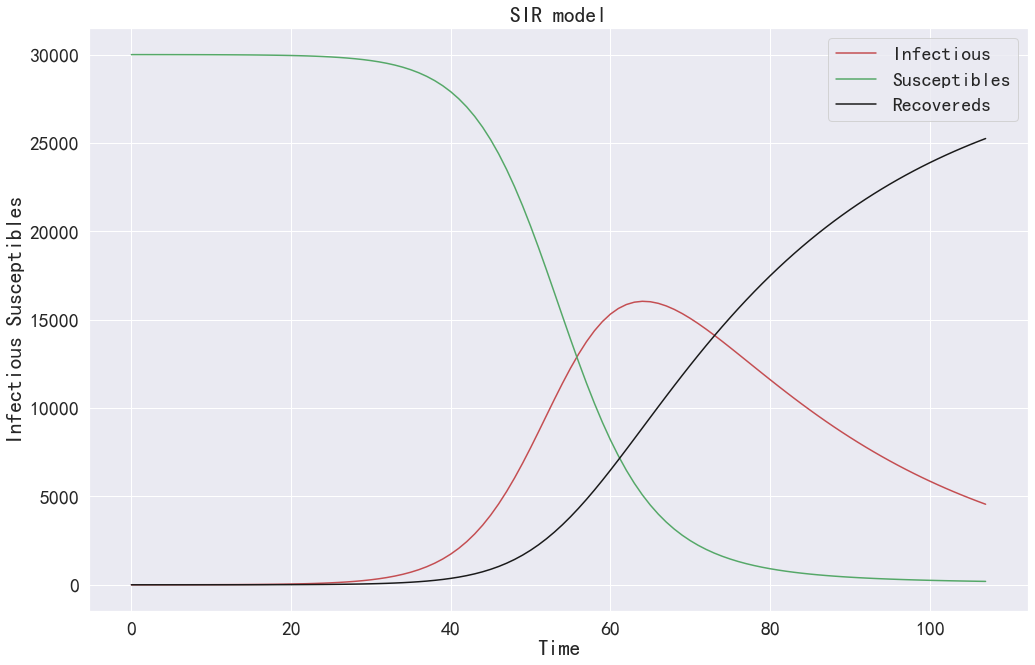

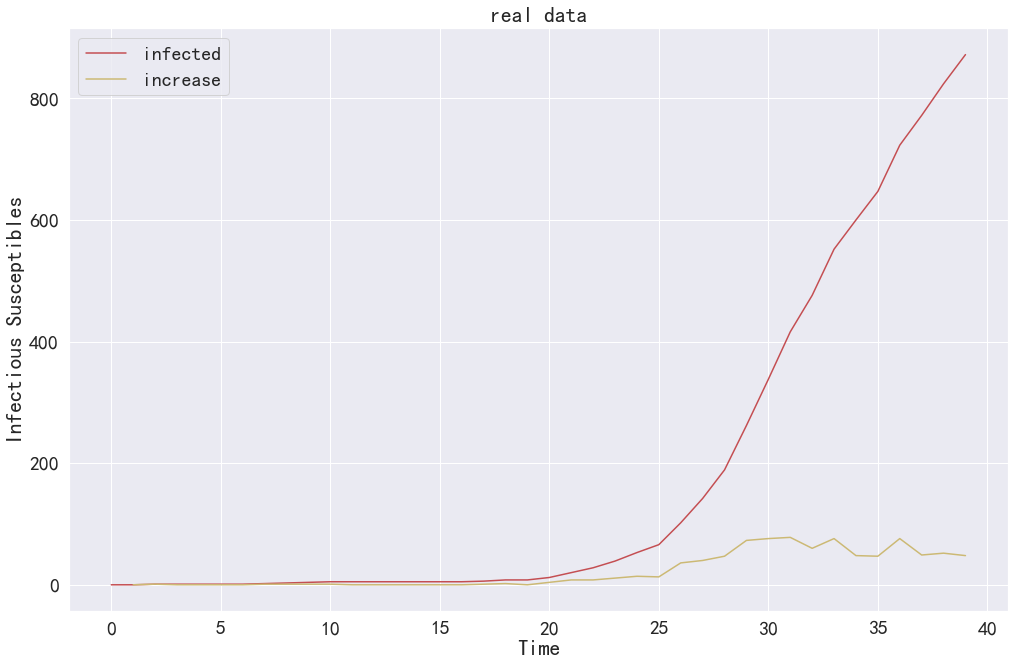

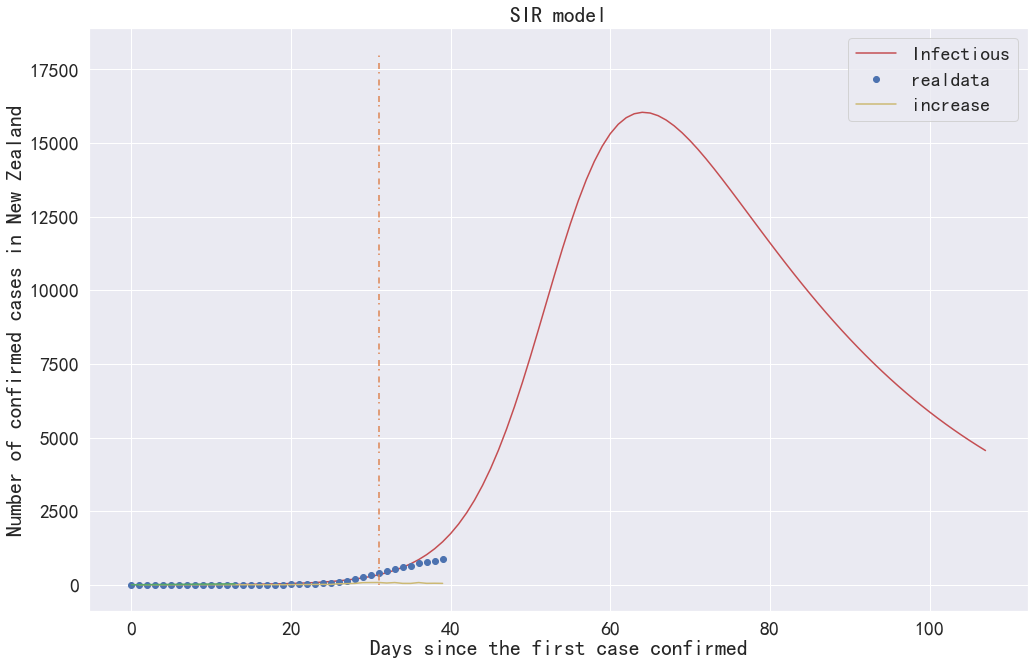

In [395]:
d1 = datetime.datetime(2020,2,26)   # 第一个日期
d2 = datetime.datetime.now()  # 第二个日期
interval = d2 - d1                   # 两日期差距
n = interval.days 

beta = 8e-6
gamma = 0.04

### lockdown check point start
x111 = 1
if (n-28) < 14:
    print("check point 1")
    ### change value of TS and TS1 below
    #TS= random.uniform(0.98,0.886)
    TS= random.uniform(0.9415,0.9471)
    #TS_add = random.uniform(0.007,0.015)
    TS_add = random.uniform(0.015,0.023)
    TS1=TS + TS_add
        
if (n-28) >= 14:
    TS= random.uniform(0.97,0.973)
    TS1=random.uniform(0.973,0.9736)
    x111 = 1
    for x111 in range(51-28-21):
        TS -= 0.003
        TS1 -= 0.003
        
elif (n-28) >= 21:
    x111 = 1
    TS= random.uniform(0.96,0.959)
    TS1=random.uniform(0.973,0.9736)
    for x111 in range(51-28-21):
        TS -= -0.005
        TS1 -= -0.005
### lockdown check point end

#TS = 0.983 #0.983 #0.97 #0.99085 #0.95
#TS1 = 0.993 #1.00125 #0.983 
ND = 100.0
S0 = 30000
I0 = 1
S1 = 30000
I1 = 1
INPUT = [S0, I0, 0.0]
INPUT_1 = [S1, I1, 0.0]


# 模型的差分方程
def diff_eqs(INP, t):
    Y = np.zeros((3))
    V = INP
    print(V)
    Y[0] = -beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y


if __name__ == "__main__":
    t_start = 0.0
    t_start_1 = 0.0
    t_end = ND
    t_inc = TS
    t_inc_1 = TS1
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    t_range_1 = np.arange(t_start_1, t_end+t_inc_1, t_inc_1)
    t_range_2 = np.arange(t_start, t_end+t_inc, t_inc)
    RES = spi.odeint(diff_eqs, INPUT, t_range)
    
    RES_1 = spi.odeint(diff_eqs, INPUT_1, t_range_1)
    
    RES_2 = spi.odeint(diff_eqs, INPUT, t_range_2)
    #print(S0,I0)
    print(RES)
    #print(len(RES))

    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(RES[:, 0], "-g", label = "Susceptibles")
    pl.plot(RES[:, 2], "-k", label = "Recovereds")
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("result.png")

# 读取数据
    data = ts_data_forecastts_1
    print(data)

# 数据作图
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(data["Total to date"], "-r", label = "infected")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
    pl.legend(loc = 0)
    pl.title("real data")
    pl.xlabel("Time")
    pl.ylabel("Infectious Susceptibles")
    pl.savefig("realdata.png")


    print("预测最大感染人数:%d 位置:%d" % (RES[:,1].max(), np.argmax(RES[:, 1])))
    print("预测感染人数:%d 位置:%d" % (RES[31:32,1].max(), 32))
# 将预测值与真实值画到一起
    fig = pl.figure()
    pl.subplot(111)
    pl.plot(RES[:, 1], "-r", label = "Infectious")
    pl.plot(data["Total to date"], "o", label = "realdata")
    pl.plot(data["Total to date"]-data["Total to date"].shift(1), "-y", label = "increase")
   # pl.plot([31:100],ydata.RES_1[:, 1],"-g", label = "Infectious after lockdown")
    #plt.annotate(s='Lockdown',xy=(31,262),xytext=(31,100))
    #plt.annotate('Lockdown', xy=(31, 262) ,xytext=(31, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
    plt.plot([31,31],[0,18000],dashes=[1,2,4,4])
   # plt.axhline(xy=([31,0]), color='r', linestyle='-')
    plt.plot([13,0],[31,0])
    pl.legend(loc = 0)
    pl.title("SIR model")
    pl.xlabel("Days since the first case confirmed")
    pl.ylabel("Number of confirmed cases in New Zealand")
    pl.savefig("test.png")
    print("Total of forecast:%d loc:%d" % (RES[31:32,1].max(), 32))

In [396]:
TS,TS1,n

(0.9433875097614224, 0.9610497450070321, 39)

In [397]:
d1 = datetime.datetime(2020,2,26)   # 第一个日期
d2 = datetime.datetime.now()  # 第二个日期
interval = d2 - d1                   # 两日期差距
interval.days 


39

In [398]:
d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_now

'2020-4-5'

In [399]:
print("Forecast - COVID-19 in NZ")
#d1 = datetime.datetime(2020,2,26)   # 第一个日期
#d2 = datetime.datetime.now()  # 第二个日期
#interval = d2 - d1                   # 两日期差距
#n = interval.days 

tomorrow = datetime.datetime.now() + datetime.timedelta(days=1) 

d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_tomorrow =  ("%d-%d-%d" % (tomorrow.year, tomorrow.month, tomorrow.day))
print("\nDate of today : %s" % d2_now)
print("Date of tomorrow : %s\n" % d2_tomorrow)

print("Days since the first case confirmed: %d" % (n-1))
print("自第一例确诊天数:%d" % (n-1))
print("\n")

print("Days in lockdown: %d" % (n-28))
print("封城天数: %d\n" % (n-28))
print("Total of now(day:%d): %d " % (n-1,ts_data_forecast['Total to date'].max()))
print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,ts_data_forecast['Total confirmed and probable cases'].max()))
#print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,RES_1[n-1:n,1].max()))
print("\n")

#print("预测感染人数:%d 自第一例确诊开始天数: %d" % (RES[n:n+1,1].max(), n))
print("预测感染人数: %d            被预测日期: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Total of forecast: %d      The date to be predicted: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new csses: %d\n" % (RES[n:n+1,1].max()-ts_data_forecast['Total to date'].max()))

print("Total of forecast(including in both confirmed and probable cases): %d      The date to be predicted: %s" % (RES_1[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new cases: %d\n" % (RES_1[n:n+1,1].max()-ts_data_forecast['Total confirmed and probable cases'].max()))

print("Prediction - The maxinum number of cases in NZ : %d on day since the first case confirmed: %d " % (RES[:,1].max(), np.argmax(RES[:, 1])-1))
print("预测最大感染人数:%d 自第一例确诊天数: %d" % (RES[:,1].max(), np.argmax(RES[:, 1])-1))

print("\nPS. Because it's less than 2 weeks since lockdown, the model of β, γ and other element are still using previous values (before lockdown).\n")
print("    Factors will be updated with an update on the official number of confirmed cases.\n")

print("    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    \n")

Forecast - COVID-19 in NZ

Date of today : 2020-4-5
Date of tomorrow : 2020-4-6

Days since the first case confirmed: 38
自第一例确诊天数:38


Days in lockdown: 11
封城天数: 11

Total of now(day:38): 872 
Total of now(day:38) & including in both confirmed and probable cases: 1039


预测感染人数: 1459            被预测日期: 2020-4-6
Total of forecast: 1459      The date to be predicted: 2020-4-6
Prediction - 24hrs new csses: 587

Total of forecast(including in both confirmed and probable cases): 1657      The date to be predicted: 2020-4-6
Prediction - 24hrs new cases: 618

Prediction - The maxinum number of cases in NZ : 16041 on day since the first case confirmed: 63 
预测最大感染人数:16041 自第一例确诊天数: 63

PS. Because it's less than 2 weeks since lockdown, the model of β, γ and other element are still using previous values (before lockdown).

    Factors will be updated with an update on the official number of confirmed cases.

    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    



print("Forecast - COVID-19 in NZ")
d1 = datetime.datetime(2020,2,26)   # 第一个日期
d2 = datetime.datetime.now()  # 第二个日期
interval = d2 - d1                   # 两日期差距
n = interval.days

tomorrow = datetime.datetime.now() + datetime.timedelta(days=1) 

d2_now = ("%d-%d-%d" % (d2.year, d2.month, d2.day))
d2_tomorrow =  ("%d-%d-%d" % (tomorrow.year, tomorrow.month, tomorrow.day))
print("\nDate of today : %s" % d2_now)
print("Date of tomorrow : %s\n" % d2_tomorrow)

print("Days since the first case confirmed: %d" % (n-1))
print("自第一例确诊天数:%d" % (n-1))
print("\n")

print("Days in lockdown: %d" % (n-28))
print("封城天数: %d\n" % (n-28))
#print("Total of now(day:%d): %d " % (n-1,RES[n-1:n,1].max()))
print("Total of now(day:%d): %s " % (n-1, ts_data_forecast['Total to date'].max()))
print("Total of now(day:%d) & including in both confirmed and probable cases: %d" % (n-1,RES_1[n-1:n,1].max()))
print("\n")

#print("预测感染人数:%d 自第一例确诊开始天数: %d" % (RES[n:n+1,1].max(), n))
print("预测感染人数: %d            被预测日期: %s" % (RES[n-1:n,1].max(), d2_tomorrow))
print("Total of forecast: %d      The date to be predicted: %s" % (RES[n:n+1,1].max(), d2_tomorrow))
print("Prediction - 24hrs new csses: %d\n" % (RES[n:n+1,1].max()-RES[n-1:n,1].max()))

print("Total of forecast(including in both confirmed and probable cases): %d      The date to be predicted: %s" % (RES_1[n-1:n,1].max(), d2_tomorrow))
print("Prediction - 24hrs new cases: %d\n" % (RES_1[n:n+1,1].max()-RES_1[n-1:n,1].max()))

print("Prediction - The maxinum number of cases in NZ : %d on day since the first case confirmed: %d " % (RES[:,1].max(), np.argmax(RES[:, 1])-1))
print("预测最大感染人数:%d 自第一例确诊天数: %d" % (RES[:,1].max(), np.argmax(RES[:, 1])-1))

print("\nPS. Because it's less than 2 weeks since lockdown, the model of β, γ and other element are still using previous values (before lockdown).\n")
print("    Factors will be updated with an update on the official number of confirmed cases.\n")

In [400]:
50-28-21

1

In [401]:
def createCounter():
    x111 = 1
    def counter():
        nonlocal x111 # 使用外层变量
        x111 += 1
        return x111
    return counter
print("%d" % x111)

1


In [402]:
### lockdown check point start
x111 = 1
if (n-28) < 14:
    print("check point 1")
    ### change value of TS and TS1 below
    TS= random.uniform(0.983,1)
    TS1=random.uniform(0.993,1)
    while TS >= TS1:
        TS= random.uniform(0.983,1)
        TS1=random.uniform(0.993,1)
if (n-28) >= 14:
    TS= random.uniform(0.97,0.973)
    TS1=random.uniform(0.973,0.9736)
    x111 = 1
    for x111 in range(51-28-21):
        TS -= 0.003
        TS1 -= 0.003
        
elif (n-28) >= 21:
    x111 = 1
    TS= random.uniform(0.96,0.959)
    TS1=random.uniform(0.973,0.9736)
    for x111 in range(51-28-21):
        TS -= -0.005
        TS1 -= -0.005
### lockdown check point end

TS, TS1, n


check point 1


(0.9960185351284514, 0.9975356010698707, 39)

In [404]:
test_data_1 = pd.read_csv(r"C:\Users\a1240\Desktop\COVID-19\nz_data\Data - geolocation - confirmed\05042020 - Confirmed.csv", encoding= 'unicode_escape')

test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN


In [405]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 9 columns):
Date of report                872 non-null object
Sex                           866 non-null object
Age group                     872 non-null object
DHB                           872 non-null object
International travel          749 non-null object
Last country before return    413 non-null object
Flight number                 298 non-null object
Flight departure date         297 non-null object
Arrival date                  422 non-null object
dtypes: object(9)
memory usage: 61.4+ KB


In [406]:
test_data_1.loc()

In [407]:
test_data_1["DHB"].astype('category').values

[Auckland, Auckland, Counties Manukau, Counties Manukau, Waitemata, ..., Waitemata, Waitemata, Southern, Southern, Auckland]
Length: 872
Categories (20, object): [Auckland, Bay of Plenty, Canterbury, Capital and Coast, ..., Wairarapa, Waitemata, West Coast, Whanganui]

In [408]:
test_data_1["DHB"].astype('category')

0              Auckland
1              Auckland
2      Counties Manukau
3      Counties Manukau
4             Waitemata
             ...       
867           Waitemata
868           Waitemata
869            Southern
870            Southern
871            Auckland
Name: DHB, Length: 872, dtype: category
Categories (20, object): [Auckland, Bay of Plenty, Canterbury, Capital and Coast, ..., Wairarapa, Waitemata, West Coast, Whanganui]

In [409]:
df_test_data_1= test_data_1.groupby('DHB') 
df_test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
698,24/03/2020,Male,50 to 59,Wairarapa,No,NaN,NaN,NaN,NaN
699,24/03/2020,Female,30 to 39,Wairarapa,Yes,Australia,QF161,20/03/2020,20/03/2020
786,22/03/2020,Male,60 to 69,West Coast,No,NaN,JQ27,17/03/2020,NaN
808,21/03/2020,Male,20 to 29,Wairarapa,Yes,France,NZ429,12/03/2020,12/03/2020


In [410]:
df_test_data_1_1 = test_data_1.groupby(['DHB', 'Sex'])
df_test_data_1_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
803,21/03/2020,Male,20 to 29,Taranaki,Yes,United Arab Emirates,NZ 8041,18/03/2020,18/03/2020
808,21/03/2020,Male,20 to 29,Wairarapa,Yes,France,NZ429,12/03/2020,12/03/2020
809,21/03/2020,Female,30 to 39,Wairarapa,Yes,United Kingdom,NZ411,17/03/2020,17/03/2020
814,20/03/2020,Male,50 to 59,Lakes,Yes,United Arab Emirates,EK0448,10/03/2020,12/03/2020


# Prepare Data

# Create as many colors as there are unique midwest['category']

categories = np.unique(df_test_data_1_1['DHB'])

colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, DHB in enumerate(categories):

    plt.scatter('Age', 'Gender',

                data=test_data_1.loc[df_test_data_1_1.DHB==DHB, :],

                s=20, cmap=colors[i], label=str(DHB))

    # "c=" 修改为 "cmap="，Python数据之道 备注



# Decorations

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),

              xlabel='Case', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)

plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)

plt.legend(fontsize=12)    

plt.show()    

In [411]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [412]:
import folium
import pandas as pd

# define the world map
world_map = folium.Map()

# display world map
world_map

In [413]:
test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN


In [414]:
pip install geopandas

  Using cached https://files.pythonhosted.org/packages/83/c5/3cf9cdc39a6f2552922f79915f36b45a95b71fd343cfc51170a5b6ddb6e8/geopandas-0.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/57/462b634a5ab562201f4f208b3cd077b80e8e04359509ec294e22f7dd006c/pyproj-2.6.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ea/55/61a5d274a210585b5d0c3dac81a82952a4baa7903e3642228d7a465fc340/Shapely-1.7.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6d/42/f4a7cac53b28fa70e9a93d0e89a24d33e14826dad6644b699362ad84dde0/Fiona-1.8.13.post1.tar.gz
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'E:\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\a1240\\AppData\\Local\\Temp\\pip-install-52sz7xf_\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\a1240\\AppData\\Local\\Temp\\pip-install-52sz7xf_\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\a1240\AppData\Local\Temp\pip-install-52sz7xf_\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [415]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [416]:
from geopy.geocoders import Nominatim

In [417]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("New Zealand")

In [418]:
# get New Zealand latitude and longitude values
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = -41.5000831, Longitude = 172.8344077


In [419]:
# New Zealand latitude and longitude values
latitude = -41.5000831
longitude = 172.8344077

# Create map and display it
san_map = folium.Map(location=[latitude, longitude], zoom_start=5)

# Display the map of New Zealand
san_map

In [420]:
test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN


In [421]:
test_data_1 = test_data_1.replace('Southern', 'Dunedin')
test_data_1 = test_data_1.replace('MidCentral', 'Palmerston North')
test_data_1 = test_data_1.replace('Lakes', 'Taupo')
test_data_1 = test_data_1.replace('Hutt Valley', 'Lower Hutt')
test_data_1 = test_data_1.replace('Capital and Coast', 'Wellington')
test_data_1 = test_data_1.replace('Canterbury', 'Christchurch')
test_data_1 = test_data_1.replace('South Canterbury', 'Timaru')
test_data_1.tail()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date
867,04/03/2020,Male,40 to 49,Waitemata,Yes,Singapore,NZ283,25/02/2020,26/02/2020
868,02/03/2020,Female,30 to 39,Waitemata,Yes,Italy,NaN,NaN,26/02/2020
869,28/02/2020,Male,40 to 49,Dunedin,NaN,NaN,NaN,NaN,NaN
870,28/02/2020,Female,40 to 49,Dunedin,NaN,NaN,NaN,NaN,NaN
871,26/02/2020,Female,60 to 69,Auckland,Yes,Indonesia,EK450,25/02/2020,26/02/2020


In [422]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 9 columns):
Date of report                872 non-null object
Sex                           866 non-null object
Age group                     872 non-null object
DHB                           872 non-null object
International travel          749 non-null object
Last country before return    413 non-null object
Flight number                 298 non-null object
Flight departure date         297 non-null object
Arrival date                  422 non-null object
dtypes: object(9)
memory usage: 61.4+ KB


In [423]:

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.001)
# 2- - create location column
test_data_1['location'] = test_data_1['DHB'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
test_data_1['point'] = test_data_1['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
test_data_1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(test_data_1['point'].tolist(), index=test_data_1.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Dunedin',), **{}).
Traceback (most recent call last):
  File "E:\Anaconda3\lib\urllib\request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "E:\Anaconda3\lib\http\client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "E:\Anaconda3\lib\http\client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "E:\Anaconda3\lib\http\client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "E:\Anaconda3\lib\http\client.py", line 1026, in _send_output
    self.send(msg)
  File "E:\Anaconda3\lib\http\client.py", line 966, in send
    self.connect()
  File "E:\Anaconda3\lib\http\client.py", line 1414, in connect
    server_hostname=server_hostname)
  File "E:\Anaconda3\lib\ssl.py", line 423, in wrap_socket
    session=session
  File "E:\Anacon

In [425]:
test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0


In [426]:
#change the path before run this
#test_data_1.to_csv("C://Users/a1240/Desktop/COVID-19/nz_data/GEO_data.csv")
test_data_1.to_csv('GEO_data_'+d2_now+'.csv') 

In [427]:
#test_data_1.groupby(["DHB", "Sex"])["Age Group"].count()

In [428]:
test_data_1.tail()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
867,04/03/2020,Male,40 to 49,Waitemata,Yes,Singapore,NZ283,25/02/2020,26/02/2020,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
868,02/03/2020,Female,30 to 39,Waitemata,Yes,Italy,NaN,NaN,26/02/2020,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
869,28/02/2020,Male,40 to 49,Dunedin,NaN,NaN,NaN,NaN,NaN,"(Dunedin, Dunedin City, Otago, 9016, New Zeala...","(-45.8740984, 170.5035755, 0.0)",-45.874098,170.503576,0.0
870,28/02/2020,Female,40 to 49,Dunedin,NaN,NaN,NaN,NaN,NaN,"(Dunedin, Dunedin City, Otago, 9016, New Zeala...","(-45.8740984, 170.5035755, 0.0)",-45.874098,170.503576,0.0
871,26/02/2020,Female,60 to 69,Auckland,Yes,Indonesia,EK450,25/02/2020,26/02/2020,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0


In [429]:
test_data_2 = test_data_1.groupby(["DHB","latitude","longitude", "Sex"])["Age group"].count()
test_data_2

DHB                 latitude    longitude   Sex   
Auckland            -36.852095  174.763180  Female    65
                                            Male      53
Bay of Plenty       -37.950376  176.938287  Female    12
                                            Male      13
Christchurch        -43.530955  172.636645  Female    32
                                            Male      20
Counties Manukau    -37.198429  174.908768  Female    37
                                            Male      28
Dunedin             -45.874098  170.503576  Female    81
                                            Male      69
Hawke's Bay         -39.434328  176.765274  Female    12
                                            Male      13
Lower Hutt          -41.212575  174.905763  Female     9
                                            Male       7
Nelson Marlborough  -41.296028  174.002221  Female    14
                                            Male      16
Northland           -35.371270  173.7


#Southern
test_data_1 = test_data_1.replace('31.990978', '-45.7')
test_data_1 = test_data_1.replace('-102.071297', '168.1')

#MidCentral
test_data_1 = test_data_1.replace('32.934902', '-40.362665')
test_data_1 = test_data_1.replace('-97.292771', '175.873863')

#Lakes
test_data_1 = test_data_1.replace('6.841547', '-38.568980')
test_data_1 = test_data_1.replace('29.826382', '176.032233')

#Hutt Valley
test_data_1 = test_data_1.replace('46.786964', '-41.218277')
test_data_1 = test_data_1.replace('15.660031', '174.903413')

#Capital and Coast
test_data_1 = test_data_1.replace('14.582842', '-41.288889')
test_data_1 = test_data_1.replace('120.971837', '174.777222')

#Canterbury
test_data_1 = test_data_1.replace('51.280028', '-43.558521')
test_data_1 = test_data_1.replace('1.080253', '172.358400')

In [430]:
test_data_1

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,04/03/2020,Male,40 to 49,Waitemata,Yes,Singapore,NZ283,25/02/2020,26/02/2020,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
868,02/03/2020,Female,30 to 39,Waitemata,Yes,Italy,NaN,NaN,26/02/2020,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
869,28/02/2020,Male,40 to 49,Dunedin,NaN,NaN,NaN,NaN,NaN,"(Dunedin, Dunedin City, Otago, 9016, New Zeala...","(-45.8740984, 170.5035755, 0.0)",-45.874098,170.503576,0.0
870,28/02/2020,Female,40 to 49,Dunedin,NaN,NaN,NaN,NaN,NaN,"(Dunedin, Dunedin City, Otago, 9016, New Zeala...","(-45.8740984, 170.5035755, 0.0)",-45.874098,170.503576,0.0


In [431]:
test_data_2.describe()

count    39.000000
mean     22.205128
std      23.450036
min       1.000000
25%       6.000000
50%      12.000000
75%      33.500000
max      81.000000
Name: Age group, dtype: float64

In [432]:
test_data_1.describe()

,latitude,longitude,altitude
count,872.000000,872.000000,872.0
mean,-39.915283,174.027001,0.0
std,3.404426,1.851665,0.0
min,-45.874098,170.503576,0.0
25%,-41.296028,173.740534,0.0
50%,-37.779227,174.763180,0.0
75%,-36.852095,175.201032,0.0
max,-35.371270,176.938287,0.0


In [433]:
# get the first 200 crimes in the cdata
limit = 1000
data = test_data_1.iloc[0:limit, :]

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(test_data_1.latitude, data.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=8, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

# Add incidents to map
san_map = folium.Map(location=[latitude, longitude], zoom_start=5.5)
san_map.add_child(incidents)

In [434]:
test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0


In [435]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 14 columns):
Date of report                872 non-null object
Sex                           866 non-null object
Age group                     872 non-null object
DHB                           872 non-null object
International travel          749 non-null object
Last country before return    413 non-null object
Flight number                 298 non-null object
Flight departure date         297 non-null object
Arrival date                  422 non-null object
location                      872 non-null object
point                         872 non-null object
latitude                      872 non-null float64
longitude                     872 non-null float64
altitude                      872 non-null float64
dtypes: float64(3), object(11)
memory usage: 95.5+ KB


In [436]:

from folium import plugins

# let's start again with a clean copy of the map of San Francisco
san_map = folium.Map(location = [latitude, longitude], zoom_start = 5.5)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(san_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(data.latitude, data.longitude, test_data_1.Sex):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# add incidents to map
san_map.add_child(incidents)

In [437]:
from folium.plugins import HeatMap

# let's start again with a clean copy of the map of San Francisco
san_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

# Convert data format
heatdata = test_data_1[['latitude','longitude']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(san_map)

san_map

In [438]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 14 columns):
Date of report                872 non-null object
Sex                           866 non-null object
Age group                     872 non-null object
DHB                           872 non-null object
International travel          749 non-null object
Last country before return    413 non-null object
Flight number                 298 non-null object
Flight departure date         297 non-null object
Arrival date                  422 non-null object
location                      872 non-null object
point                         872 non-null object
latitude                      872 non-null float64
longitude                     872 non-null float64
altitude                      872 non-null float64
dtypes: float64(3), object(11)
memory usage: 95.5+ KB


In [439]:
test_data_1.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0


In [440]:
group_age_sex = test_data_1.groupby(['Sex','Age group'])
group_age_sex.groups

{('Female',
  '60 to 69'): Int64Index([  0,  12,  46,  53,  61,  72, 124, 128, 148, 162, 176, 177, 188,
             190, 227, 235, 255, 261, 294, 298, 353, 367, 390, 411, 441, 460,
             463, 464, 480, 533, 536, 548, 554, 578, 587, 604, 626, 629, 649,
             671, 678, 724, 742, 745, 754, 761, 766, 794, 806, 810, 815, 819,
             834, 871],
            dtype='int64'),
 ('Female',
  '20 to 29'): Int64Index([  1,   2,   5,   6,  20,  27,  49,  51,  55,  66,
             ...
             756, 758, 759, 765, 778, 784, 788, 816, 830, 859],
            dtype='int64', length=135),
 ('Male',
  '40 to 49'): Int64Index([  3,  39,  78, 139, 155, 174, 229, 247, 248, 251, 266, 268, 272,
             275, 280, 312, 314, 316, 342, 356, 357, 360, 374, 394, 402, 421,
             425, 434, 440, 443, 445, 486, 491, 510, 529, 555, 565, 579, 605,
             627, 640, 647, 675, 693, 704, 709, 729, 757, 762, 763, 818, 822,
             823, 826, 831, 842, 844, 846, 851, 857, 866, 867, 8

In [441]:
group_age_sex.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,28/03/2020,Female,1 to 4,Waikato,No,NaN,NaN,NaN,NaN,"(Waikato, New Zealand, (-37.77922725, 175.2010...","(-37.77922725, 175.2010323246593, 0.0)",-37.779227,175.201032,0.0
449,27/03/2020,NaN,40 to 49,Christchurch,Yes,United Kingdom,TG917,20/03/2020,22/03/2020,"(Christchurch, Canterbury, New Zealand, (-43.5...","(-43.530955, 172.6366455, 0.0)",-43.530955,172.636645,0.0
467,27/03/2020,Female,1 to 4,Timaru,NaN,NaN,NaN,NaN,NaN,"(Timaru, Timaru District, Canterbury, 7910, Ne...","(-44.3930254, 171.2509786, 0.0)",-44.393025,171.250979,0.0
527,26/03/2020,Female,1 to 4,Christchurch,Yes,Australia,NaN,NaN,15/03/2020,"(Christchurch, Canterbury, New Zealand, (-43.5...","(-43.530955, 172.6366455, 0.0)",-43.530955,172.636645,0.0


In [442]:
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import matplotlib
import datetime
import seaborn as sns
import math 
from sklearn import neighbors
from pylab import rcParams

In [443]:
#group_age_sex.info

In [444]:
#group_age_sex_json = json.dumps(group_age_sex)
#group_age_sex_json

In [445]:
group_age_sex_df= pd.DataFrame(group_age_sex)
group_age_sex_df

,0,1
0,"(Female, 1 to 4 )",Date of report Sex Age group ...
1,"(Female, 10 to 14)",Date of report Sex Age group ...
2,"(Female, 15 to 19)",Date of report Sex Age group ...
3,"(Female, 20 to 29)",Date of report Sex Age group ...
4,"(Female, 30 to 39)",Date of report Sex Age group ...
5,"(Female, 40 to 49)",Date of report Sex Age group ...
6,"(Female, 50 to 59)",Date of report Sex Age group ...
7,"(Female, 60 to 69)",Date of report Sex Age group ...
8,"(Female, 70+ )",Date of report Sex Age group ...
9,"(Male, 10 to 14)",Date of report Sex Age group ...


In [446]:
Age_group = pd.value_counts(test_data_1['Age group'])
Age_group

20 to 29     223
50 to 59     146
40 to 49     133
30 to 39     131
60 to 69     122
70+           56
15 to 19      38
10 to 14      20
 1 to 4        3
Name: Age group, dtype: int64

In [447]:
age_group_range = ['1 to 4','10 to 14','15 to 19','20 to 29','30 to 39','40 to 49', '50 to 59','60 to 69','70+'] 
count_age_group = [4,12,31,167,97,108,99,86,43] 
  
age_group_range_series = pd.Series(age_group_range) 
count_age_group_series = pd.Series(count_age_group) 
  
frame = { 'Age group': age_group_range_series, 'Numbers': count_age_group_series } 
  
result_age_group = pd.DataFrame(frame) 
  
#result['Age'] = pd.Series(age) 
print(result_age_group) 

  Age group  Numbers
0    1 to 4        4
1  10 to 14       12
2  15 to 19       31
3  20 to 29      167
4  30 to 39       97
5  40 to 49      108
6  50 to 59       99
7  60 to 69       86
8       70+       43


In [448]:
result_age_group

,Age group,Numbers
0,1 to 4,4
1,10 to 14,12
2,15 to 19,31
3,20 to 29,167
4,30 to 39,97
5,40 to 49,108
6,50 to 59,99
7,60 to 69,86
8,70+,43


In [449]:
group_age_sex.head()

,Date of report,Sex,Age group,DHB,International travel,Last country before return,Flight number,Flight departure date,Arrival date,location,point,latitude,longitude,altitude
0,05/04/2020,Female,60 to 69,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
1,05/04/2020,Female,20 to 29,Auckland,NaN,NaN,NaN,NaN,NaN,"(Auckland, 1010, New Zealand, (-36.852095, 174...","(-36.852095, 174.7631803, 0.0)",-36.852095,174.763180,0.0
2,05/04/2020,Female,20 to 29,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
3,05/04/2020,Male,40 to 49,Counties Manukau,NaN,NaN,NaN,NaN,NaN,"(Counties Manukau, Franklin Road, Buckland, Fr...","(-37.1984291, 174.9087676, 0.0)",-37.198429,174.908768,0.0
4,05/04/2020,Female,30 to 39,Waitemata,NaN,NaN,NaN,NaN,NaN,"(North Island / Te Ika-a-Māui, Waitematā Harbo...","(-36.8212269, 174.66980747974335, 0.0)",-36.821227,174.669807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,28/03/2020,Female,1 to 4,Waikato,No,NaN,NaN,NaN,NaN,"(Waikato, New Zealand, (-37.77922725, 175.2010...","(-37.77922725, 175.2010323246593, 0.0)",-37.779227,175.201032,0.0
449,27/03/2020,NaN,40 to 49,Christchurch,Yes,United Kingdom,TG917,20/03/2020,22/03/2020,"(Christchurch, Canterbury, New Zealand, (-43.5...","(-43.530955, 172.6366455, 0.0)",-43.530955,172.636645,0.0
467,27/03/2020,Female,1 to 4,Timaru,NaN,NaN,NaN,NaN,NaN,"(Timaru, Timaru District, Canterbury, 7910, Ne...","(-44.3930254, 171.2509786, 0.0)",-44.393025,171.250979,0.0
527,26/03/2020,Female,1 to 4,Christchurch,Yes,Australia,NaN,NaN,15/03/2020,"(Christchurch, Canterbury, New Zealand, (-43.5...","(-43.530955, 172.6366455, 0.0)",-43.530955,172.636645,0.0


In [450]:
group_age_sex_df = pd.DataFrame(group_age_sex['Sex'].value_counts())
group_age_sex_df

Sex
Sex    Age group Sex        
Female  1 to 4   Female    3
       10 to 14  Female   12
       15 to 19  Female   28
       20 to 29  Female  135
       30 to 39  Female   72
       40 to 49  Female   68
       50 to 59  Female   66
       60 to 69  Female   54
       70+       Female   22
Male   10 to 14  Male      8
       15 to 19  Male     10
       20 to 29  Male     85
       30 to 39  Male     59
       40 to 49  Male     63
       50 to 59  Male     79
       60 to 69  Male     68
       70+       Male     34

In [451]:
import numpy as np 

year=group_age_sex['Sex']
data1=group_age_sex['Age group']
#data2=group_age_sex['Sex']
radius1=[np.sqrt(i) for i in data1]
radius2=[np.sqrt(i) for i in data2]
x=[radius1[0]]

for i in range(len(radius1)):
    try:
        x.append(radius1[i]+radius1[i+1]+x[-1])
    except:
        continue 
y=[100 for i in range(0,7)]
xy=[i for i in zip(x,y)]     

fig=plt.figure(figsize=[20,20],facecolor=(0,47/255,99/255))
ax=fig.add_subplot(1,1,1,facecolor=(0,47/255,99/255))
ax.axis('off')
plt.yticks(range(-100,900,100), fontsize=14.5)
plt.xticks(range(-100,900,100), fontsize=14.5)
for i in range(len(x)):
    circ=plt.Circle(xy=xy[i],radius=radius1[i],color='w')
    ax.add_patch(circ)
for i in range(len(x)):
    circ=plt.Circle(xy=xy[i],radius=radius2[i],color=(58/255,94/255,148/255))
    ax.add_patch(circ)
pgon1=plt.Polygon([[-100,100],[800,100],[800,300],[-100,300]],color=(0,47/255,99/255))
pgon3=plt.Polygon([[0,140],[880,140]],color='w')#白色的线
ax.add_patch(pgon1)
ax.add_patch(pgon3)
for i in range(len(x)):
    plt.text(x=x[i],y=y[i]+15,s='%s'%year[i],color='w',ha='center',va='bottom',fontsize=14.5)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]-0.8*radius1[i],s='%s'%data1[i],color=(0,47/255,99/255),ha='center',va='bottom',fontsize=14.5)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]-1.1*radius2[i],s='%s'%data2[i],color=(0,47/255,99/255),ha='center',va='top',fontsize=11.5)


In [452]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1) 

d_yesterday = ("%d-%d-%d" % (yesterday.year, yesterday.month, yesterday.day))

In [453]:
d_yesterday

'2020-4-4'

Text(-30, 115, 'Age group:')

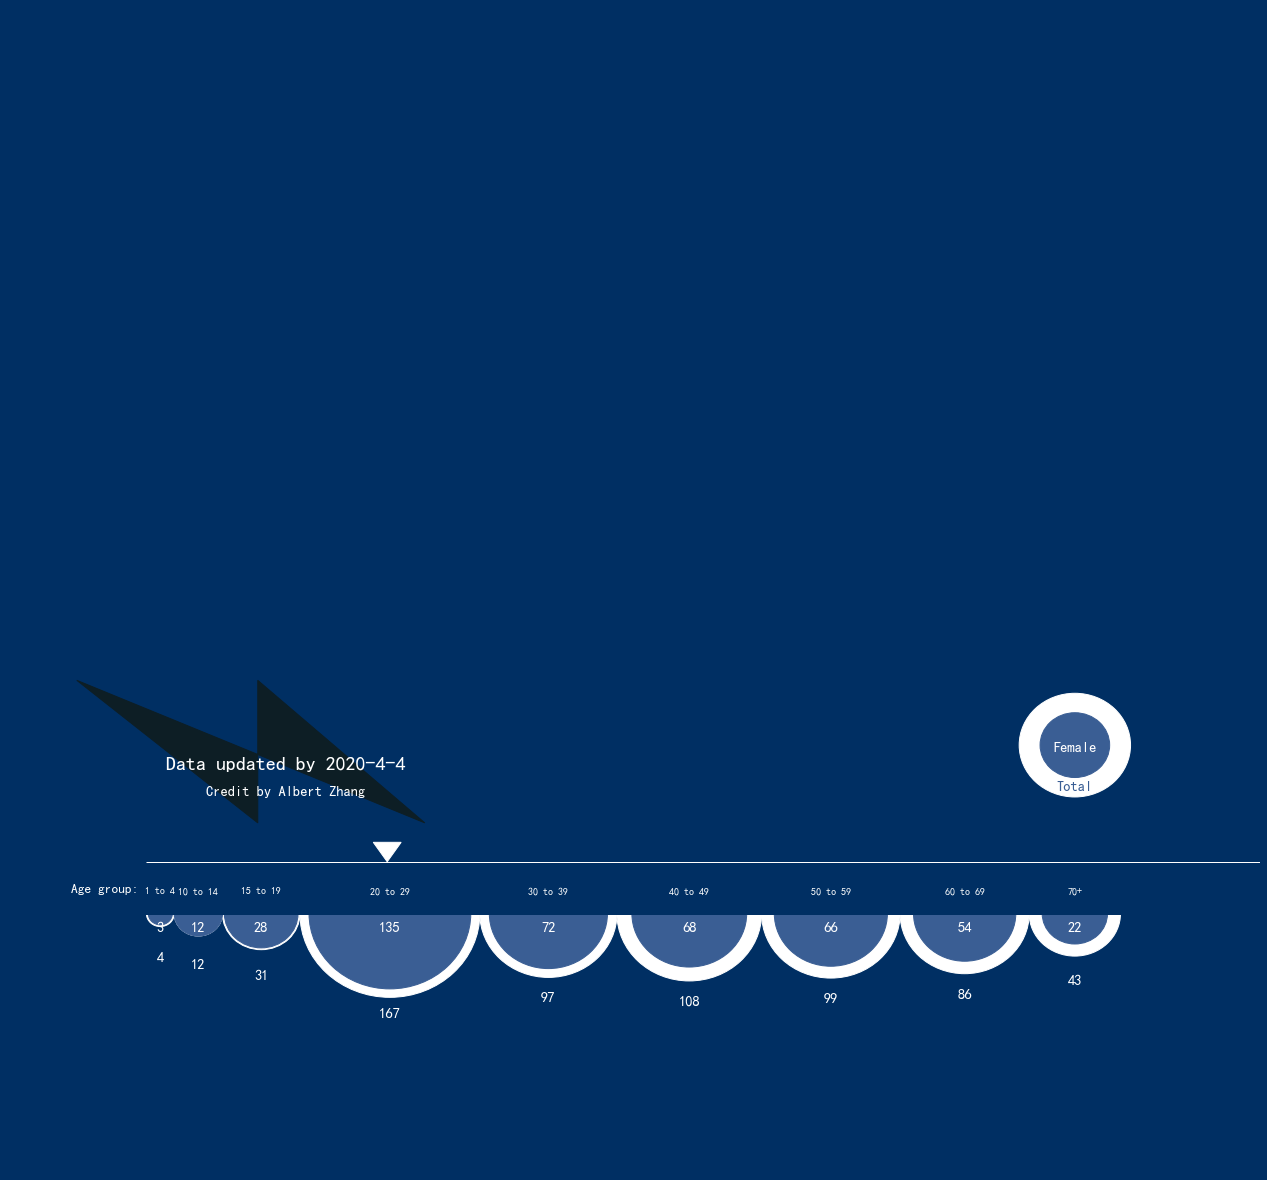

In [454]:
import numpy as np
from matplotlib import pyplot as plt
year=result_age_group['Age group']
sex=group_age_sex_df['Sex']
data1=result_age_group['Numbers']
data2=group_age_sex_df['Sex']
#data2=[0,0,100,275,400,480,580]
radius1=[np.sqrt(i)*5 for i in data1]
radius2=[np.sqrt(i)*5 for i in data2]
x=[radius1[0]]

for i in range(len(radius1)):
    try:
        x.append(radius1[i]+radius1[i+1]+x[-1])
    except:
        continue 
y=[100 for i in range(0,11)]
xy=[i for i in zip(x,y)]     

fig=plt.figure(figsize=[20,20],facecolor=(0,47/255,99/255))
ax=fig.add_subplot(1,1,1,facecolor=(0,47/255,99/255))
ax.axis('off')
plt.yticks(range(-100,900,100), fontsize=14.5)
plt.xticks(range(-100,900,100), fontsize=14.5)
for i in range(len(x)):
    circ=plt.Circle(xy=xy[i],radius=radius1[i],color='w')
    ax.add_patch(circ)
for i in range(len(x)):
    circ=plt.Circle(xy=xy[i],radius=radius2[i],color=(58/255,94/255,148/255))
    ax.add_patch(circ)
pgon1=plt.Polygon([[-100,100],[800,100],[800,300],[-100,300]],color=(0,47/255,99/255))#background
pgon2=plt.Polygon([[-50,280],[80,170],[80,280],[200,170]],color=(13/255, 30/255, 37/255)) #black logo
pgon3=plt.Polygon([[0,140],[880,140]],color='w')#白色的线
pgon4=plt.Polygon([[173,140],[163,155],[183,155]],color='w')
ax.add_patch(pgon1)
ax.add_patch(pgon2)
ax.add_patch(pgon3)
ax.add_patch(pgon4)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]-15,s='%s'%sex[i],color='w',ha='center',va='bottom',fontsize=14.5)
    
for i in range(len(x)):
    plt.text(x=x[i],y=y[i]+15,s='%s'%year[i],color='w',ha='center',va='bottom',fontsize=10)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]-0.8*radius1[i]-30,s='%s'%data1[i],color='w',ha='center',va='bottom',fontsize=14.5)

circ=plt.Circle((667,230),40,color='w')
ax.add_patch(circ)

circ=plt.Circle((667,230),25,color=(58/255,94/255,148/255))
ax.add_patch(circ)

plt.text(x=x[i],y=y[i]-0.8*radius1[i]+150,s='Female',color='w',ha='center',va='bottom',fontsize=14.5)
plt.text(x=x[i],y=y[i]-0.8*radius1[i]+120,s='Total',color=(58/255,94/255,148/255),ha='center',va='bottom',fontsize=14.5)

plt.text(x=100,y=y[i]+110,s='Data updated by %s'%d_yesterday,color='w',ha='center',va='bottom',fontsize=20)
plt.text(x=100,y=y[i]+90,s='Credit by Albert Zhang',color='w',ha='center',va='bottom',fontsize=14.5)
plt.text(x=-30,y=y[i]+15,s='Age group:',color='w',ha='center',va='bottom',fontsize=13.5)
    
#for i in range(len(x)):
 #   plt.text(x=x[i],y=y[i]-0.8*radius2[i],s='%s'%data2[i],color=(0,47/255,99/255),ha='center',va='bottom',fontsize=14.5)

#for i in range(len(x)):
 #   plt.text(x=x[i],y=y[i]-1.1*radius2[i],s='%s'%data2[i],color=(0,47/255,99/255),ha='center',va='top',fontsize=11.5)

#plt.savefig('D:\\test2.png',facecolor=fig.get_facecolor(),dpi=500)

In [112]:
group_age_sex_df_1 = group_age_sex_df

In [113]:
group_age_sex_df_1['Sex'].loc['Male'].loc['0 to 4'] = '0'

group_age_sex_df_1

Sex
Sex    Age group Sex        
Female  1 to 4   Female    3
       10 to 14  Female   10
       15 to 19  Female   27
       20 to 29  Female  129
       30 to 39  Female   69
       40 to 49  Female   66
       50 to 59  Female   62
       60 to 69  Female   52
       70+       Female   20
Male   10 to 14  Male      5
       15 to 19  Male     10
       20 to 29  Male     79
       30 to 39  Male     54
       40 to 49  Male     60
       50 to 59  Male     77
       60 to 69  Male     63
       70+       Male     32

In [114]:

group_age_sex_df

Sex
Sex    Age group Sex        
Female  1 to 4   Female    3
       10 to 14  Female   10
       15 to 19  Female   27
       20 to 29  Female  129
       30 to 39  Female   69
       40 to 49  Female   66
       50 to 59  Female   62
       60 to 69  Female   52
       70+       Female   20
Male   10 to 14  Male      5
       15 to 19  Male     10
       20 to 29  Male     79
       30 to 39  Male     54
       40 to 49  Male     60
       50 to 59  Male     77
       60 to 69  Male     63
       70+       Male     32

In [115]:
result_age_group

,Age group,Numbers
0,1 to 4,4
1,10 to 14,12
2,15 to 19,31
3,20 to 29,167
4,30 to 39,97
5,40 to 49,108
6,50 to 59,99
7,60 to 69,86
8,70+,43


In [116]:
age_group_range_1 = ['1 to 4','10 to 14','15 to 19','20 to 29','30 to 39','40 to 49', '50 to 59','60 to 69','70+'] 
count_age_group_1 = [0,5,7,63,36,55,55,46,27] 
  
age_group_range_series_1 = pd.Series(age_group_range_1) 
count_age_group_series_1 = pd.Series(count_age_group_1) 
  
frame_1 = { 'Age group': age_group_range_series_1, 'Numbers': count_age_group_series_1 } 
  
result_age_group_1 = pd.DataFrame(frame_1) 
  
#result['Age'] = pd.Series(age) 
print(result_age_group_1) 

  Age group  Numbers
0    1 to 4        0
1  10 to 14        5
2  15 to 19        7
3  20 to 29       63
4  30 to 39       36
5  40 to 49       55
6  50 to 59       55
7  60 to 69       46
8       70+       27


year=result_age_group_1['Age group']
sex=group_age_sex_df['Sex']
data1=result_age_group_1['Numbers']
data2=group_age_sex_df['Sex']
#data2=[0,0,100,275,400,480,580]
radius1=[np.sqrt(i)*7 for i in data1]
radius2=[np.sqrt(i)*7 for i in data2]
x=[radius1[0]]

for i in range(len(radius1)):
    try:
        x.append(radius1[i]+radius1[i+1]+x[-1])
    except:
        continue 
y=[100 for i in range(0,11)]
xy=[i for i in zip(x,y)]     

fig=plt.figure(figsize=[20,20],facecolor=(0,47/255,99/255))
ax=fig.add_subplot(1,1,1,facecolor=(0,47/255,99/255))
ax.axis('off')
plt.yticks(range(-100,900,100), fontsize=14.5)
plt.xticks(range(-100,900,100), fontsize=14.5)
for i in range(len(x)):
    circ=plt.Circle(xy=xy[i],radius=radius1[i],color='w')
    ax.add_patch(circ)
for i in range(len(x)):
    circ=plt.Circle(xy=xy[i],radius=radius2[i],color=(58/255,94/255,148/255))
    ax.add_patch(circ)
pgon1=plt.Polygon([[-100,100],[800,100],[800,300],[-100,300]],color=(0,47/255,99/255))#background
pgon2=plt.Polygon([[-50,280],[80,170],[80,280],[200,170]],color=(13/255, 30/255, 37/255)) #black logo
pgon3=plt.Polygon([[0,140],[880,140]],color='w')#白色的线
pgon4=plt.Polygon([[173,140],[163,155],[183,155]],color='w')
ax.add_patch(pgon1)
ax.add_patch(pgon2)
ax.add_patch(pgon3)
ax.add_patch(pgon4)

#for i in range(len(x)):
 #   plt.text(x=x[i+1],y=y[i]-15,s='%s'%sex[i],color='w',ha='center',va='bottom',fontsize=14.5)
    
for i in range(len(x)):
    plt.text(x=x[i],y=y[i]+15,s='%s'%year[i],color='w',ha='center',va='bottom',fontsize=10)

for i in range(len(x)):
    plt.text(x=x[i],y=y[i]-0.8*radius1[i]-30,s='%s'%data1[i],color='w',ha='center',va='bottom',fontsize=14.5)

circ=plt.Circle((667,230),40,color='w')
ax.add_patch(circ)

circ=plt.Circle((667,230),25,color=(58/255,94/255,148/255))
ax.add_patch(circ)

plt.text(x=x[i],y=y[i]-0.8*radius1[i]+150,s='Female',color='w',ha='center',va='bottom',fontsize=14.5)
plt.text(x=x[i],y=y[i]-0.8*radius1[i]+120,s='Total',color=(58/255,94/255,148/255),ha='center',va='bottom',fontsize=14.5)

plt.text(x=100,y=y[i]+110,s='Data updated by %s'%d_yesterday,color='w',ha='center',va='bottom',fontsize=20)
plt.text(x=100,y=y[i]+90,s='Credit by Albert Zhang',color='w',ha='center',va='bottom',fontsize=14.5)
plt.text(x=-30,y=y[i]+15,s='Age group:',color='w',ha='center',va='bottom',fontsize=13.5)

In [322]:
Sc_data = pd.read_csv(r"C:\Users\a1240\Desktop\COVID-19\nz_data\Data - Significant clusters\05042020 - Significant clusters.csv")

Sc_data.head()

,Clusters under investigation,Location,Total to date,New in last 24 hours
0,School,Auckland,66,6.0
1,Event,Southland,58,3.0
2,Workplace,Waikato,56,2.0
3,Event,Queenstown,32,0.0
4,Workplace,Auckland,16,0.0


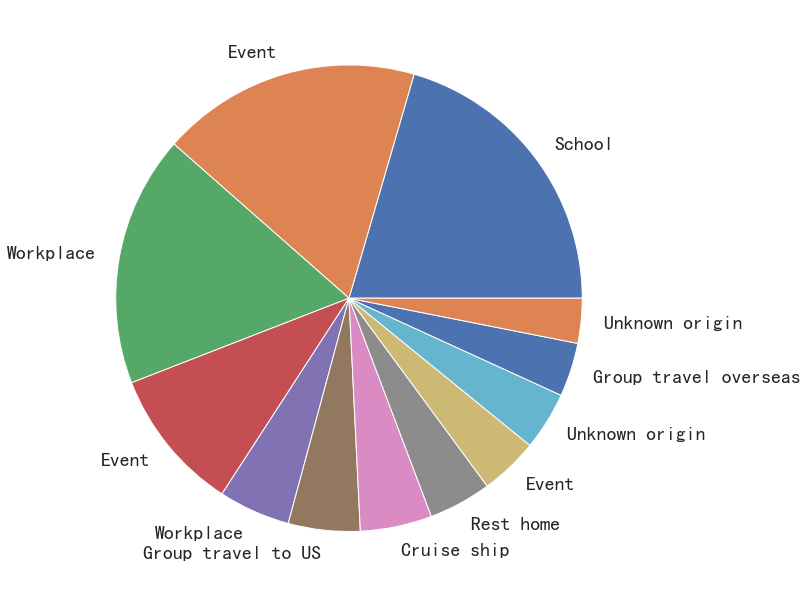

In [323]:
plt.pie(Sc_data['Total to date'],labels=Sc_data['Clusters under investigation'])

plt.show()

In [324]:
Sc_data_1 = Sc_data.groupby('Clusters under investigation')['Total to date'].sum()
Sc_data_1

Clusters under investigation
Cruise ship               16
Event                    103
Group travel overseas     12
Group travel to US        16
Rest home                 14
School                    66
Unknown origin            23
Workplace                 72
Name: Total to date, dtype: int64

In [328]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [329]:
Sc_data_2 = Sc_data['Clusters under investigation']
Sc_data_2

0                    School
1                     Event
2                 Workplace
3                     Event
4                 Workplace
5        Group travel to US
6               Cruise ship
7                 Rest home
8                     Event
9            Unknown origin
10    Group travel overseas
11           Unknown origin
Name: Clusters under investigation, dtype: object

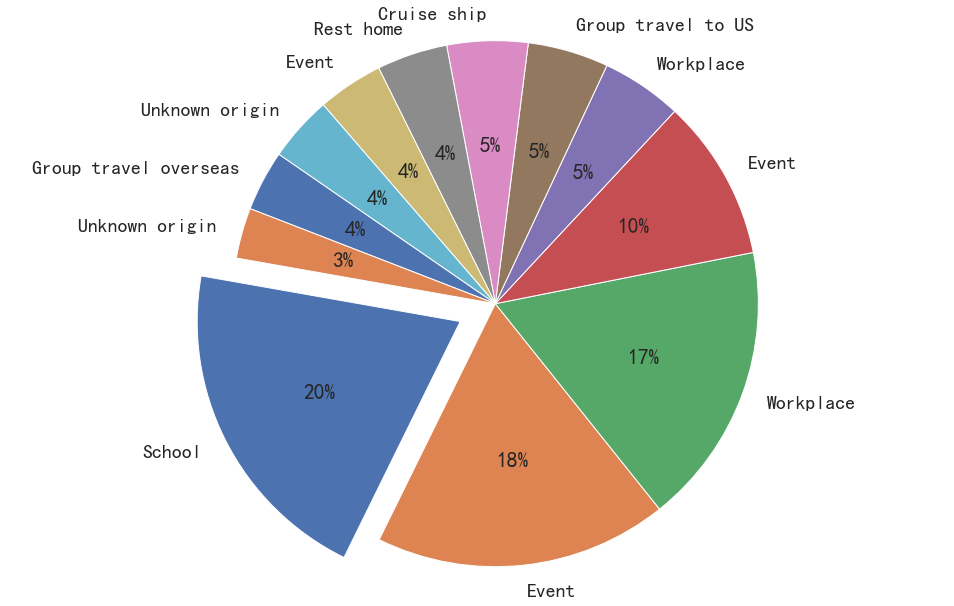

In [331]:
from matplotlib import font_manager as fm
import matplotlib as mpl

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

explode = (0.15,0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(Sc_data['Total to date'], labels=Sc_data['Clusters under investigation'], autopct='%1.0f%%',explode=explode,
        shadow=False, startangle=170)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.savefig('Demo_project.jpg')
plt.show()

In [346]:
Sc_data.head()

,Clusters under investigation,Location,Total to date,New in last 24 hours
0,School,Auckland,66,6.0
1,Event,Southland,58,3.0
2,Workplace,Waikato,56,2.0
3,Event,Queenstown,32,0.0
4,Workplace,Auckland,16,0.0


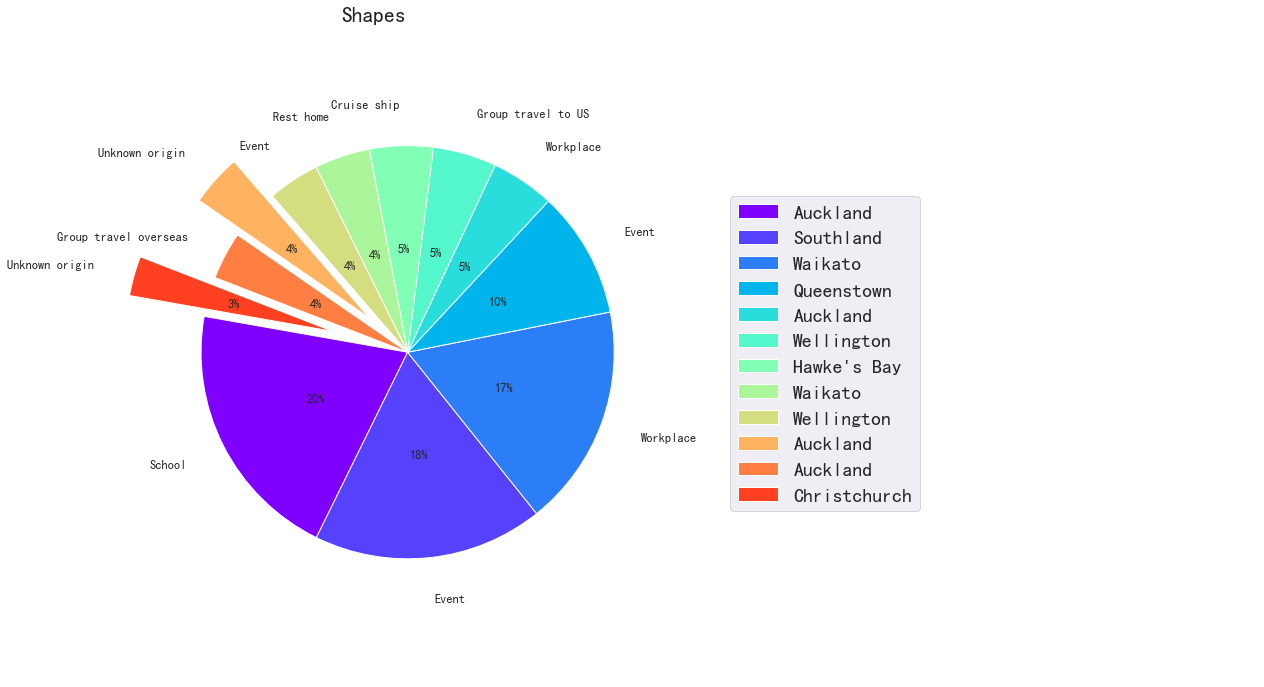

In [464]:
from matplotlib import font_manager as fm
from  matplotlib import cm

#labels = Sc_data['Clusters under investigation']
#sizes = Sc_data['Total to date']
explode = (0,0,0,0,0,0,0,0,0,0.1,0,0.15)  # "explode" ， show the selected slice

fig, axes = plt.subplots(figsize=(18,10),ncols=2) # 设置绘图区域大小
ax1, ax2 = axes.ravel()

colors = cm.rainbow(np.arange(len(Sc_data['Total to date']))/len(Sc_data['Total to date'])) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(Sc_data['Total to date'], labels=Sc_data['Clusters under investigation'], autopct='%1.0f%%',explode=explode,
        shadow=False, startangle=170, colors=colors, labeldistance=1.2,pctdistance=0.5, radius=0.4)
# labeldistance: 控制labels显示的位置
# pctdistance: 控制百分比显示的位置
# radius: 控制切片突出的距离

ax1.axis('equal')  

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size('xx-small')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Shapes', loc='center')

# ax2 只显示图例（legend）
ax2.axis('off')
ax2.legend(patches, Sc_data['Location'], loc='center left')


plt.tight_layout()
# plt.savefig("pie_shape_ufo.png", bbox_inches='tight')
#plt.savefig('Demo_project_final.jpg')
plt.show()

auth_series = Sc_data.groupby('Clusters under investigation')['Total to date'].sum().index
article_series = pd.Series(Sc_data['Total to date'].groupby('Clusters under investigation')
    
frame_test = { 'Clusters under investigation': auth_series , 'Total to date':article_series} 
  
result_test = pd.DataFrame(frame_test) 
  
print(result_test) 

In [335]:
result_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
Total to date    7 non-null object
dtypes: object(1)
memory usage: 184.0+ bytes


from matplotlib import font_manager as fm
import matplotlib as mpl

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

explode = (0.15,0,0,0,0,0,0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(Sc_data['Total to date'], labels=Sc_data['Clusters under investigation'], autopct='%1.0f%%',explode=explode,
        shadow=False, startangle=170)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.savefig('Demo_project.jpg')
plt.show()

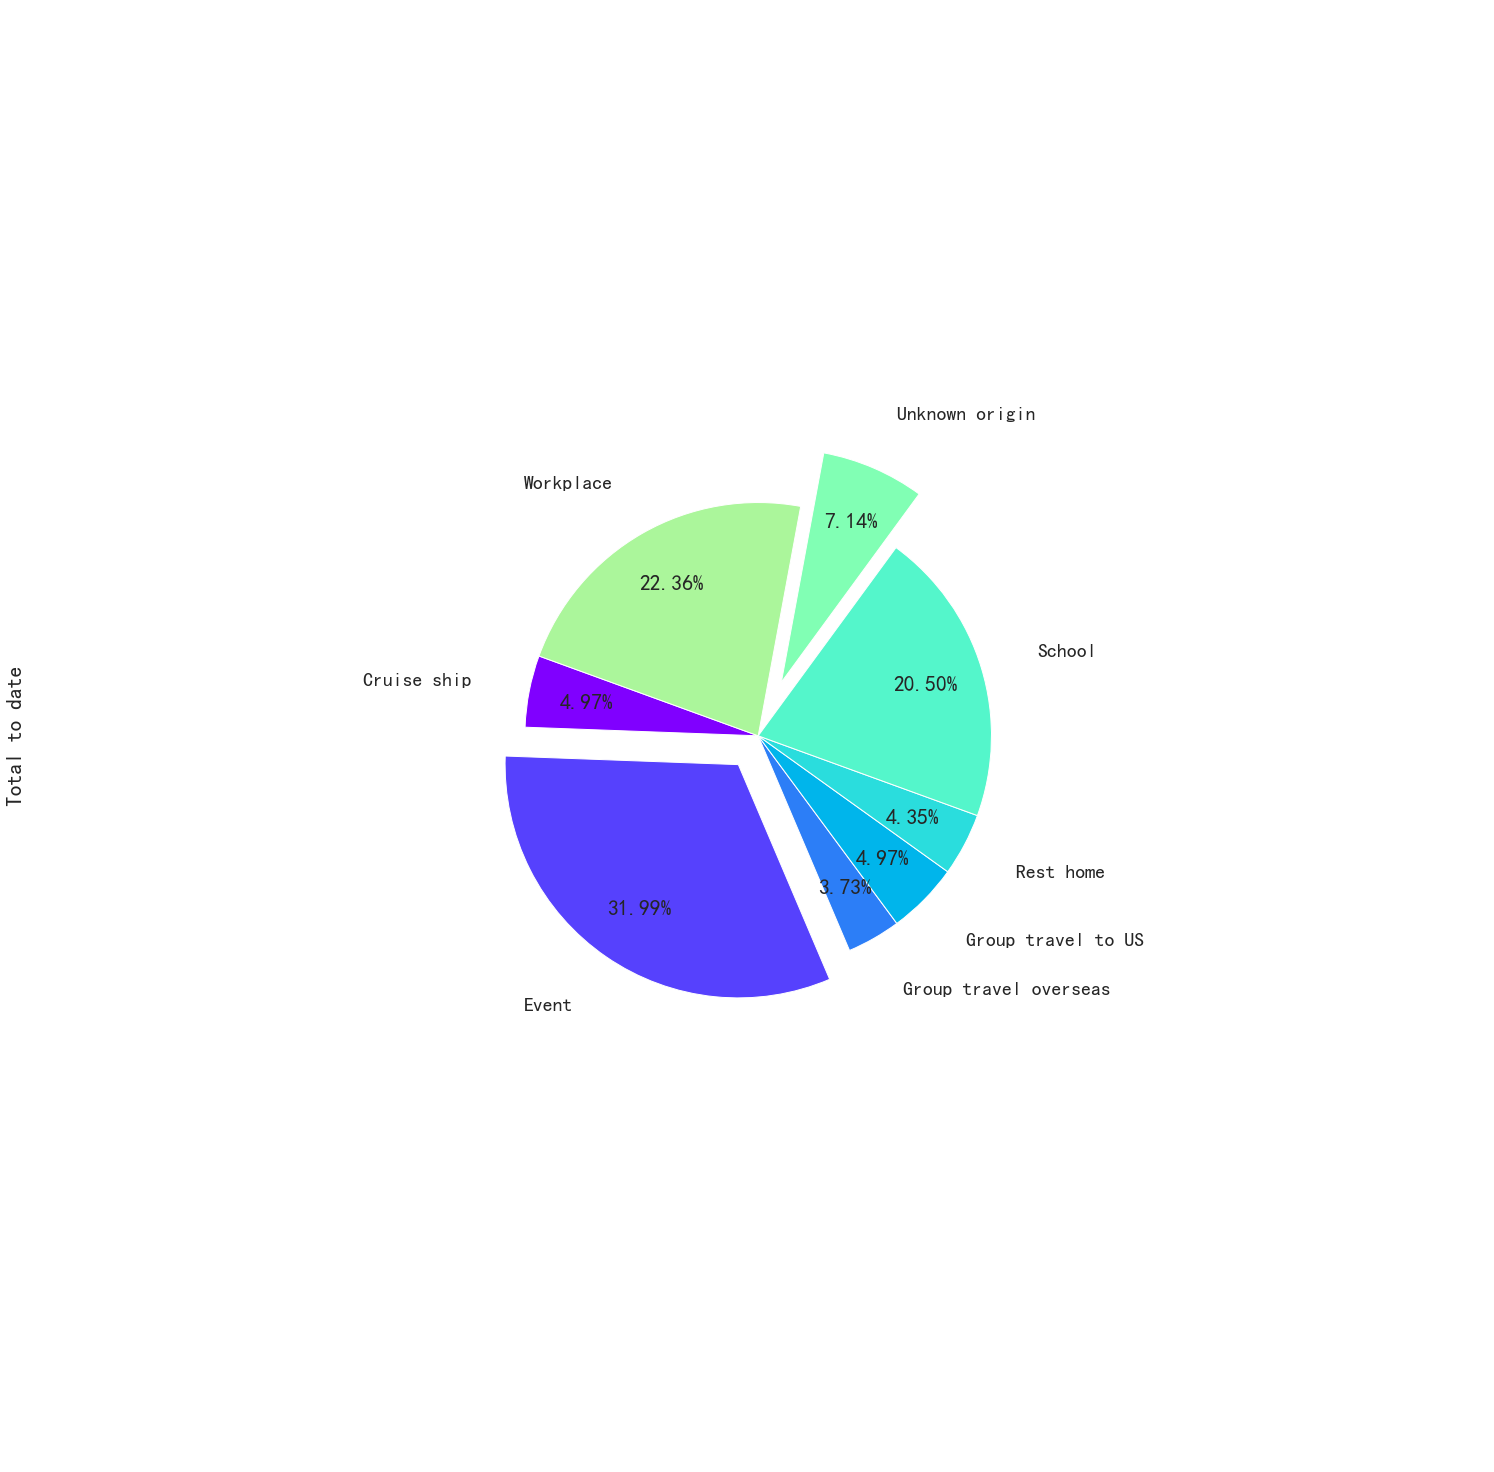

In [467]:
Sc_data.groupby('Clusters under investigation')['Total to date'].sum().plot(kind='pie', figsize=(25, 25), autopct='%1.2f%%',
                                                                            explode = (0,0.06,0,0,0,0,0.1,0),
                                                                            startangle=160,
                                                                            colors = cm.rainbow(np.arange(len(Sc_data['Total to date']))/len(Sc_data['Total to date'])),
                                                                            labeldistance=1.25,pctdistance=0.75,
                                                                            radius=0.4,shadow=False )
plt.savefig('Clusters_PieChart_%s.jpg'% d2_now)

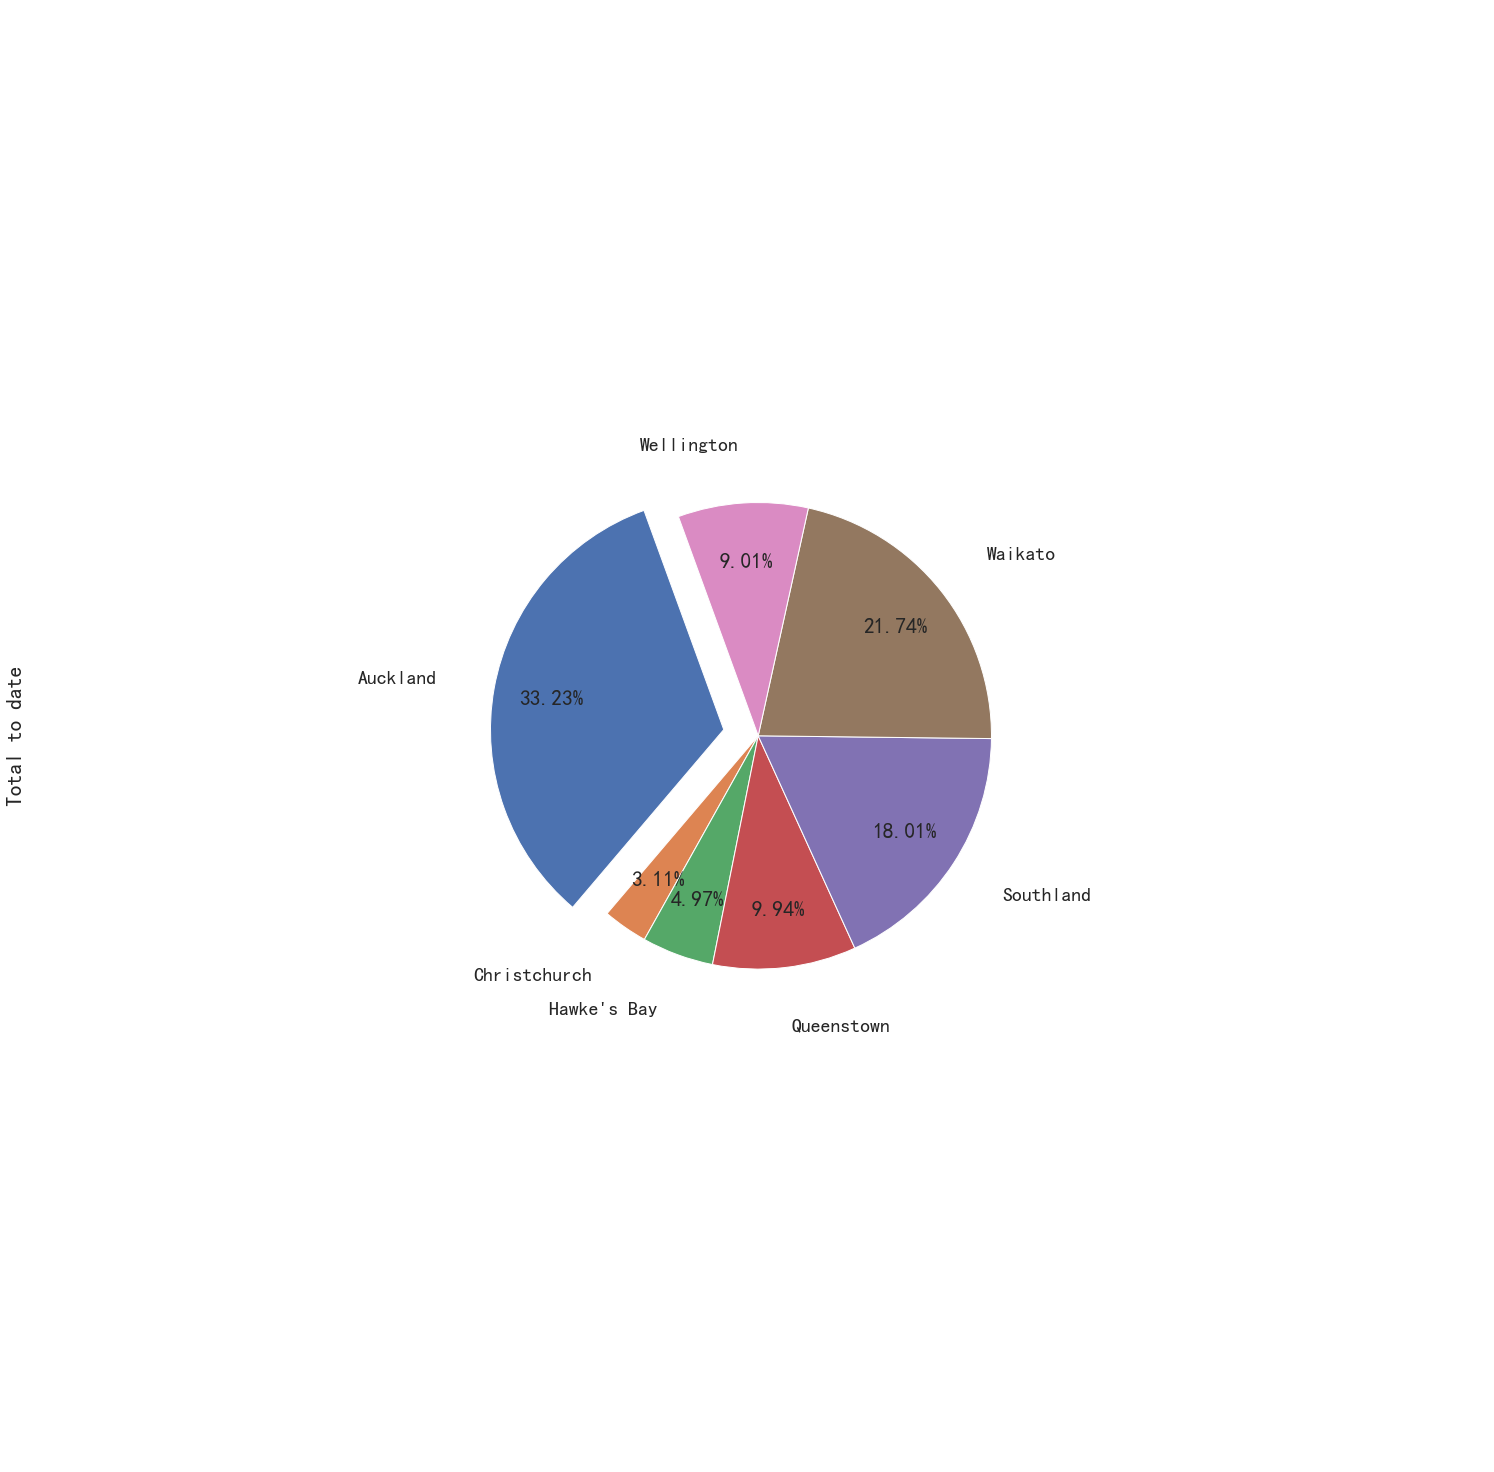

In [468]:
Sc_data.groupby('Location')['Total to date'].sum().plot(kind='pie', figsize=(25, 25), autopct='%1.2f%%',
                                                                            explode = (0.06,0,0,0,0,0,0),
                                                                            startangle=110,
                                                                            #colors = cm.rainbow(np.arange(len(Sc_data['Total to date']))/len(Sc_data['Total to date'])),
                                                                            labeldistance=1.25,pctdistance=0.75,
                                                                            radius=0.4,shadow=False )
plt.savefig('Clusters_PieChart_Location_%s.jpg'% d2_now)